1. Sobre la carpeta de imágenes binarias, repetir el experimento que se realizó en clase con los dígitos. Verificar la capacidad para reconocer imágenes con diferentes cantidades de ruido.

(50, 50)

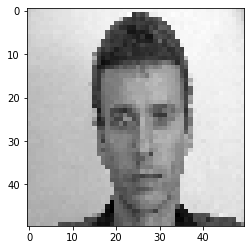

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import cv2 as cv
img = cv.imread('caras/f1.jpg',0)
img = cv.resize(img, (50,50))
plt.imshow(img, cmap='gray')
img.shape

In [2]:
# Recibe una imagen binario uint8 y la convierte a vector columna 
# con patrones binarios{-1,1}
def im2vector(img):
    # Se crea un vector con los datos de la imagen
    imgData = np.asarray(img)
    # Los datos binarios del vector de 0 y 255 se pasan a -1 y 1.
    imgData = (imgData/255)*2 - 1
    # se convierte a entero, ya que habiam quedado float
    imgData = imgData.astype('int8')
    # se obtiene el tamaño del arreglo
    size = imgData.size
    # Se convierte a vector columna
    imgData = imgData.reshape(size,1)
    return(imgData)

In [3]:
imSalida = im2vector(img)
imSalida.T

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [4]:
# Para obtener una lsta con los nombres de archivos del directorio
def ls(ruta = Path.cwd()):
    return [arch.name for arch in Path(ruta).iterdir() if arch.is_file()]
lis = ls()
lis = ls('caras')
lis

['f1.jpg',
 'f2.jpg',
 'f3.jpg',
 'f4.jpg',
 'f5.jpg',
 'f6.jpg',
 'f7.jpg',
 'f8.jpg',
 'f9.jpg']

In [5]:
# funcion para crear el conjunto de entrenamiento a partir de las imagenes en el directorio


def datosImagenes(directorio):
    # Cargamos la lista de archivos en el directorio
    lis = ls(directorio)
    # Valor del umbral para binarizar
    THRESHOLD = 100
    # Se crea una matriz vacía para ir añadiendo los patrones
    #P = np.zeros((3145728, 1),np.uint8)
    P = np.array([])
    #P = cv.resize(P, (5184, 6912))
    for archivo in lis:
        #Se carga la imagen cuyo nombre esta en la variable archivo
        img = cv.imread(directorio+"/"+archivo,0)
        # de imagen RGB a Binaria
        umbral, new_im = cv.threshold(img, THRESHOLD,255, cv.THRESH_BINARY)
        #Cambiamos el tamaño
        new_im = cv.resize(new_im, (50,50))
        # convertimos la imagen a vector columna
        
        vector = im2vector(new_im)
        # Adjuntamos vector por vector en la matriz, como una nueva columna
        if (P.size==0):
            P = vector
        else:
            P = np.c_[P,vector]
        
    #  fin del for

    return(P)

In [6]:
matrizVectores = datosImagenes('caras')

In [7]:
matrizVectores[:5,:]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8)

In [8]:
X = matrizVectores.T
X.shape


(9, 2500)

In [9]:
lista = list(range(9))
Y = np.array(lista)
Y

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
## Entrenar un MLP para memorizar los dígitos

from sklearn.neural_network import MLPClassifier

net = MLPClassifier(activation='tanh', max_iter=5000, hidden_layer_sizes=(4,4))
net.fit(X, Y)


MLPClassifier(activation='tanh', hidden_layer_sizes=(4, 4), max_iter=5000)

In [11]:
# Se calcula la salida para el conjunto de entrada
print('prediccion:', net.predict(X))

prediccion: [1 1 7 3 4 5 6 7 3]


In [12]:
# Una función que agrege ruido a una imagen de entrada

def addNoise(img,porc):
    imgData = np.asarray(img)
    imgData2 = np.copy(imgData)
    f,c = imgData.shape
    for i in range(f):
        for j in range(c):
            if (np.random.rand(1)*100)<porc:
                if np.random.rand(1)<0.5:
                    imgData2[i,j]=255
                else:
                    imgData2[i,j]=0
    imNoise = imgData2.astype('uint8')
    return(imNoise) 
def vector2im(vector,f,c):
    # se convierte a matriz f x c
    vector = vector.reshape(f,c)
    # Se binariza a 0-255
    vector = ((vector +1)/2)*255
    # se convierte el arreglo a entero 0 a 255
    im = vector.astype('uint8')
    return(im)

In [13]:
nuevaImagen = vector2im(imSalida,2500,1)
imgRuido = addNoise(nuevaImagen,30)
imgRuido.shape

(2500, 1)

In [14]:
entrada = im2vector(imgRuido).T
# Se calcula la salida para el conjunto de entrada
print('prediccion:', net.predict(entrada))

prediccion: [3]


2- Teniendo en cuenta el conjunto de imágenes de caras suministradas realizar las siguientes acciones.

(50, 50)

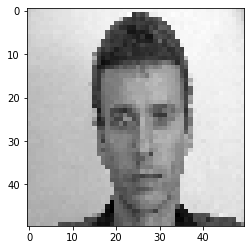

In [15]:
img2 = cv.imread('imagenesBinarias/test-caras/p2.jpg',0)
img2 = cv.resize(img, (50,50))
plt.imshow(img2, cmap='gray')
img2.shape

In [16]:
imSalida2 = im2vector(img2)
imSalida2.T
nuevaImagen2 = vector2im(imSalida2,2500,1)
entrada2 = im2vector(img2).T
# Se calcula la salida para el conjunto de entrada
print('prediccion:', net.predict(entrada2))

prediccion: [8]
